# ANÁLISIS DE DATOS - SISTEMA DE RECOMENDACIONES

Proyecto de sistema de recomendaciones genérico a partir de recomendaciones de usuarios para películas producidas entre 1995 y 2015. 

Realizado por Rafael Delgado y Manuel García Romero.

Asignatura de Machine Learning.
Master en Ingeniería del Software: Cloud, Datos y Gestión IT.

## Dataset movielens

MovieLens es un sistema de recomendación basado en la web y una comunidad virtual que recomienda películas para que sus usuarios las vean, en función de sus preferencias cinematográficas mediante el filtrado colaborativo de las clasificaciones y críticas de películas de los miembros.

El dataset seleccionado para configurar un sistema de recomendaciones específicamente recoge más de 100.000 filas (instancias) y 4 columnas (UserID, ItemID, Rating y TimeStamp) donde hay información de 943 usuarios y 1682 películas.

Fuente: https://grouplens.org/datasets/movielens/100k/


### Carga de datos

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("./u.data", sep="\t", header=None)

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
#Nos indica las filas y columnas respectivamente que tiene el dataframe.
df.shape 


(100000, 4)

In [6]:
#TRANSFORMACIÓN DE LOS NOMBRE DE LAS COLUMNAS.
#La columna 0 se refiere al ID de la película, la columna 1 al ID del usuario, la columna 2 al rating.
#y la columna 3 al timestamp desde el epoch

df.columns = ["UserID", "ItemID", "Rating","TimeStamp"]
df.head()

,UserID,ItemID,Rating,TimeStamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### Análisis exploratorio de los items


In [7]:
import matplotlib.pyplot as plt

(array([ 6110.,     0., 11370.,     0.,     0., 27145.,     0., 34174.,
            0., 21201.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

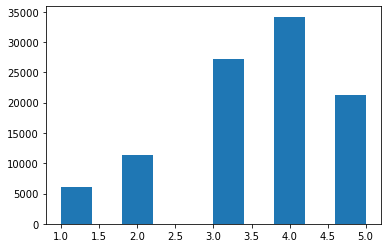

In [8]:
#Histograma para ver la distribución de los ratings que dejan los usuarios.
plt.hist(df.Rating)

(array([11459.,  5724., 19359.,  9315.,  9396., 10083.,  6175.,  9603.,
        10048.,  8838.]),
 array([8.74724710e+08, 8.76580903e+08, 8.78437096e+08, 8.80293288e+08,
        8.82149481e+08, 8.84005674e+08, 8.85861867e+08, 8.87718060e+08,
        8.89574252e+08, 8.91430445e+08, 8.93286638e+08]),
 <BarContainer object of 10 artists>)

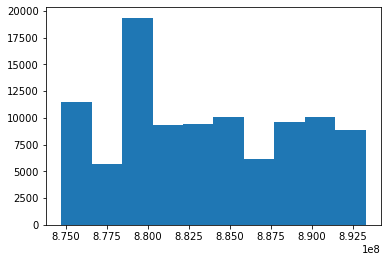

In [9]:
#Histograma para ver la distribución de las valoraciones a películas producidas 
#entre 1995 y 2015 (Timestamp en segundos desde el epoch).

plt.hist(df.TimeStamp)

#Hay valoraciones de las películas en todas las franjas de tiempo desde 1995 y 2015.

In [10]:
#Comprobar cuantas valoraciones hay para cada uno de los 5 Rating dados por los usuarios.
df.groupby(['Rating'])["UserID"].count()

Rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: UserID, dtype: int64

In [11]:
#Comprobar cuanta gente ha visto cada película (item)

VisualizacionesPeliculas= df.groupby(['ItemID'])['ItemID'].count()
VisualizacionesPeliculas




ItemID
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Name: ItemID, Length: 1682, dtype: int64

(array([1.146e+03, 2.490e+02, 1.390e+02, 6.700e+01, 3.800e+01, 2.400e+01,
        7.000e+00, 5.000e+00, 6.000e+00, 1.000e+00]),
 array([  1. ,  59.2, 117.4, 175.6, 233.8, 292. , 350.2, 408.4, 466.6,
        524.8, 583. ]),
 <BarContainer object of 10 artists>)

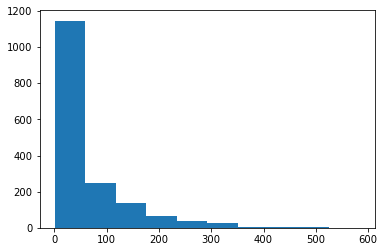

In [12]:
#A continuación, en esta gráfica se concluye que habrá películas que han sido más vistas
#y tendrán más presencia en el sistema de recomendaciones.

plt.hist(VisualizacionesPeliculas)

### Representación en forma matricial

Para ofrecer un sistema de recomendaciones necesitamos tener una matriz de valoraciones para
poder llevar a cabo la tarea de crear un sistema de recomendación dinámico.


In [19]:
import numpy as np

In [20]:
#Usuarios que han dejado una valoraciónabs
n_users = df.UserID.unique().shape[0]
n_users 


943

In [21]:
#Películas que han sido valoradas
n_items = df.ItemID.unique().shape[0]
n_items

1682

In [22]:
#La matriz de valoraciones o ratings estará formada por filas de usuarios y columnas de películas.
#Esta matriz será una matriz de ceros y es muy ineficiente, ya que habrá películas raras que no tenga
#apenas valoraciones dadas por los usuarios (0)
ratings = np.zeros((n_users, n_items))


In [24]:
#Con este bucle, guardamos en la matriz las valoraciones de cada usuario para cada película.
for row in df.itertuples():
    ratings[row[1]-1,row[2]-1] = row[3]

In [25]:
type(ratings)

numpy.ndarray

In [26]:
ratings.shape
#943 filas de usuarios, 1682 columnas de películas

(943, 1682)

In [50]:
#Matriz de ratings
ratings

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [48]:
sparsity = float(len(ratings.nonzero()[0]))
sparsity /=  (ratings.shape[0]*ratings.shape[1])
sparsity *= 100
print("Coeficiente de sparseidad: {:4.2f}% . Esté porcentaje representa la parte del total de la matriz que no está vacía"
      .format(sparsity))


Coeficiente de sparseidad: 6.30% . Esté porcentaje representa la parte del total de la matriz que no está vacía


### Crear conjuntos de entrenamiento y validación


In [55]:
from sklearn.model_selection import train_test_split

In [58]:
#Conjunto de test de 30% y de entrenamiento del 70. random_state (semilla aleatoria) la fijamos en 42
ratings_train, ratings_test = train_test_split(ratings, test_size=0.3, random_state=42)

In [59]:
#660 de usuarios para el entrenamiento
ratings_train.shape

(660, 1682)

In [60]:
ratings_test.shape

(283, 1682)

In [ ]:
#283 usuarios de prueba, a los que se les ofrecerá una recomendación.

Se va a predecir o recomendar para un item dado (usuario). A este se le va a ofrecer otro item (película)
si la sumada ponderada del resto de usuarios para dicho item (película) es similar a la que ha ofrecido el usuario.
Es decir, si conocemos las películas que ha visto un usuario y las valoraciones que les ha dado sabremos de
sus gustos y podremos buscar otras películas que otros usuarios hayan valorado positivamente siendo parecidos
en los gustos de este usuario y habrá una película que se le recomiende.

Para ello se utilizará la distancia coseno, para intentar encontrar los usuarios más parecidos y con esos usuarios parecidos se va a elaborar una suma ponderada para ver cúales de las películas que el usuario inicial todavía no ha visto, necesita que se le recomienden.

## Filtrado colaborativo basado en Usuarios

* Matriz de similaridad entre los usuarios (distancia del coseno).
* Predecir la valoración desconocida de un item 'i' para un usuario activo 'u' basada en la suma ponderada de todas las valoraciones del resto de usuarios para dicho item.
* Recomendación de nuevos items a los usuarios según lo establecido en los pasos anteriores.

In [216]:
import numpy as np
import sklearn

In [217]:
#La distancia del coseno siempre da resultados entre 0 y 1
#Un coseno igual a 0 significa que la distancia es nula (los usuarios son los más parecido posibles).
#La similaridad es todo lo contrario: cuánto más cercano a 1 es cuando más parecido son los usuarios.

#Habrá que hacer una transformación en la que los 0 de la función coseno se transformen en 1 
#(los más parecidos acorde la similaridad);
#mientras que los 1 (elementos más divergentes según la función coseno) se transforman a 0

sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings_train)

In [218]:
type(sim_matrix)

numpy.ndarray

In [219]:
#660 usuarios de train contra sí mismos
sim_matrix.shape

(660, 660)

In [220]:
#La diagonal es 1 porque es un usuario contra sí mismo (1 de similaridad)
#el que se encuentra al lado del primer usuario de todos (0.17448349) es un 17,44% de similar a dicho primer usuario)
sim_matrix #Matriz de similaridad

array([[1.        , 0.17448349, 0.18009754, ..., 0.13331459, 0.17695593,
        0.21882481],
       [0.17448349, 1.        , 0.07993097, ..., 0.07175808, 0.09552622,
        0.05512655],
       [0.18009754, 0.07993097, 1.        , ..., 0.0191736 , 0.02233385,
        0.10310785],
       ...,
       [0.13331459, 0.07175808, 0.0191736 , ..., 1.        , 0.04853428,
        0.05142508],
       [0.17695593, 0.09552622, 0.02233385, ..., 0.04853428, 1.        ,
        0.1198022 ],
       [0.21882481, 0.05512655, 0.10310785, ..., 0.05142508, 0.1198022 ,
        1.        ]])

In [221]:
#Prediccion de la valoración o rating que da cada usuario a cada película en función de todos los datos de la comunidad.
users_predictions = sim_matrix.dot(ratings_train) / np.array([np.abs(sim_matrix).sum(axis=1)]).T

In [222]:
users_predictions

array([[2.10259747e+00, 5.86975978e-01, 3.40264192e-01, ...,
        0.00000000e+00, 7.33611460e-03, 6.04379414e-03],
       [1.40999723e+00, 2.91863934e-01, 2.68085289e-01, ...,
        0.00000000e+00, 3.50378592e-03, 2.32963985e-03],
       [1.69014833e+00, 3.13648440e-01, 3.26127887e-01, ...,
        0.00000000e+00, 3.25391767e-03, 1.77210119e-03],
       ...,
       [1.73393747e+00, 4.06719333e-01, 3.21166908e-01, ...,
        0.00000000e+00, 2.71269625e-03, 9.00511411e-03],
       [2.34361031e+00, 8.10544770e-01, 4.73941025e-01, ...,
        0.00000000e+00, 1.01130066e-02, 9.66427605e-03],
       [2.36796969e+00, 5.98146138e-01, 3.85569804e-01, ...,
        0.00000000e+00, 6.39996638e-03, 5.37442746e-03]])

In [225]:
#Error cuadrático
from sklearn.metrics import mean_squared_error

In [233]:
def get_mse(preds,actuals):
    #if preds.shape[0] != actuals.shape[0]:
      #  actuals=actuals.T
        preds = preds[actuals.nonzero()].flatten()
        actuals = actuals[actuals.nonzero()].flatten()
        return mean_squared_error(preds,actuals)

In [234]:
get_mse(users_predictions, ratings_train)

7.878218313143215

In [235]:
get_mse(users_predictions, ratings_test) 
#El error crece un poquito respecto al del entrenamiento, pero sigue siendo una buena opción 
#elegir este sistema como predicción

8.745164067978985

## Filtrado colaborativo basado en los K-Nearest Neighbor (KNN) de los usuarios



In [165]:
from sklearn.neighbors import NearestNeighbors

In [173]:
#k vecinos (usuarios) más parecidos.
k = 5 

In [174]:
neighbors = NearestNeighbors(k,'cosine')

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5, radius=cosine as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [175]:
neighbors.fit(ratings_train)

NearestNeighbors(radius='cosine')

In [200]:
top_k_distances, top_k_users= neighbors.kneighbors(ratings_train, return_distance=True)

In [201]:
top_k_distances.shape

(660, 5)

In [202]:
top_k_distances[0]

array([ 0.        , 41.71330723, 43.3474336 , 45.04442252, 45.04442252])

In [203]:
top_k_users.shape

(660, 5)

In [204]:
top_k_users[0] #Los 5 usuarios más parecidos al usuario que ocupa la primera posición.

array([  0, 211,  16, 583, 428], dtype=int64)

In [205]:
#Predicción de valoración que da cada usuario a cada película en función de los 5 usuarios que más se parecen a mí
users_predicts_k=np.zeros(ratings_train.shape) #crea matriz de ceros
for i in range(ratings_train.shape[0]):
    users_predicts_k[i,:] = top_k_distances[i].T.dot(ratings_train[top_k_users][i])/np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T

In [206]:
users_predicts_k.shape #660 filas de usuarios para 1682 columnas de películas

(660, 1682)

In [207]:
users_predicts_k #La mayoría de usuarios dan 0 como ratings para cada película.

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.74469557, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.9753676 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [240]:
get_mse(users_predicts_k, ratings_train)

8.182806324823378

In [241]:
get_mse(users_predicts_k, ratings_test)

11.338299214622172

## Filtrado colaborativo basado en items (películas)

In [112]:
n_movies = ratings_train.shape[1]
n_movies

1682

In [113]:
neighbors = NearestNeighbors(n_movies, 'cosine')

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1682, radius=cosine as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [114]:
#Se establecen comparaciones entre las películas (todas con todas) según las valoraciones obtenidas
neighbors.fit(ratings_train.T) #Transpuesta para que queden en fila las películas

NearestNeighbors(n_neighbors=1682, radius='cosine')

In [116]:
top_k_distances, top_k_items = neighbors.kneighbors(ratings_train.T, return_distance=True)

In [117]:
top_k_distances.shape

(1682, 1682)

In [118]:
#Películas, de más cercana a más lejana, respecto a cada película que ocupa la primera posición en la fila.
#Para la película 0, que es ToyStory, se recomiendo mucho la película 120 y 404 que en el dataset u.item se refieren a las 
#películas The Independence Day y Mission Impossible
#De las películas menos recomendadas, que se encuentran en la 49 sería Star Wars.
top_k_items 

array([[   0,  120,  404, ...,  285,  312,  301],
       [   1,  575,  232, ...,  257,   99,   49],
       [   2,  742, 1094, ...,  180,   99,   49],
       ...,
       [1565, 1571, 1570, ...,  180,   99,   49],
       [1680, 1671, 1582, ...,  180,   99,   49],
       [1681, 1596, 1592, ...,  180,   99,   49]], dtype=int64)

In [119]:
top_k_items.shape

(1682, 1682)

In [121]:
item_preds = ratings_train.dot(top_k_distances)/np.array([np.abs(top_k_distances).sum(axis=1)])

In [122]:
item_preds.shape

(660, 1682)

In [123]:
item_preds #Distancia entre películas

array([[0.        , 0.31842643, 0.37009323, ..., 1.44850442, 1.4566397 ,
        1.54530823],
       [0.        , 0.0545379 , 0.06227954, ..., 0.20078701, 0.20112087,
        0.21332472],
       [0.        , 0.03522479, 0.04073126, ..., 0.18456903, 0.18654661,
        0.20076303],
       ...,
       [0.        , 0.08968346, 0.10313623, ..., 0.42050197, 0.4196067 ,
        0.45863507],
       [0.        , 0.25835756, 0.29918119, ..., 1.31043371, 1.32278067,
        1.41390683],
       [0.        , 0.07174777, 0.08538024, ..., 0.25535196, 0.25259645,
        0.26199652]])

In [124]:
get_mse(item_preds,ratings_train)

11.172565375125632

In [126]:
get_mse(item_preds,ratings_test)

11.876775601508902

## Filtrado colaborativo basado en KNN de los items (películas)

In [245]:
k = 30
neighbors = NearestNeighbors(k,'cosine')
neighbors.fit(ratings_train.T)
top_k_distances, top_k_items = neighbors.kneighbors(ratings_train.T,return_distance=True)

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=30, radius=cosine as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [246]:
top_k_distances.shape
#Top 30 de películas más cercanas para cada una de las 1682 películas.

(1682, 30)

In [247]:
top_k_items[0] #Top 30 de películas más cercanas a la película 0, que es ToyStory

array([  0, 120, 404, 116, 221, 150, 117, 180,   6, 741,  27,  94, 256,
       236, 124,  81,  24, 587, 227, 110, 234,  78, 203, 545,  70,  14,
        68, 596,  49, 143], dtype=int64)

In [248]:
top_k_distances[0]

array([ 0.        , 53.12249994, 54.38749856, 55.50675635, 56.49778757,
       56.9473441 , 57.21013896, 57.81003373, 58.10335619, 58.16356248,
       58.19793811, 58.37807808, 58.70264049, 58.83876273, 58.97457079,
       59.52310476, 59.61543424, 59.84981203, 59.89156869, 59.94163828,
       60.15812497, 60.35726965, 60.37383539, 60.63002556, 60.86049622,
       61.11464636, 61.31883887, 61.37589103, 61.57109712, 61.80614856])

In [249]:
#Hacemos la predicción basandonos en el top_k de similaridades
preds= np.zeros(ratings_train.T.shape)

In [141]:
for i in range(ratings_train.T.shape[0]):
    if(i%50==0):
        print("iter"+str(i))
    den = 1
    if(np.abs(top_k_distances[i]).sum(axis=0)>0):
        den= np.abs(top_k_distances[i]).sum(axis=0)
    preds[i,:] = top_k_distances[i].dot(ratings_train.T[top_k_items][i])/np.array([den]).T

iter0
iter50
iter100
iter150
iter200
iter250
iter300
iter350
iter400
iter450
iter500
iter550
iter600
iter650
iter700
iter750
iter800
iter850
iter900
iter950
iter1000
iter1050
iter1100
iter1150
iter1200
iter1250
iter1300
iter1350
iter1400
iter1450
iter1500
iter1550
iter1600
iter1650


In [238]:
get_mse(preds,ratings_train.T)

8.733998550319365

In [239]:
get_mse(preds,ratings_test.T)

11.569795775277525